# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2021-s109a/blob/master/lectures/crest.png?raw=true"> CS-S109A Introduction to Data Science 

## Lecture 6: Classification and Logistic Regression

**Harvard University**<br>
**Summer 2021**<br>
**Instructors:** Kevin Rader<br>
**Authors:** Rahul Dave, David Sondak, Will Claybaugh, Pavlos Protopapas, Chris Tanner, Kevin Rader

---

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Logistic Regression</li> 
<li> More Logistic Regression </li> 
<li> Classification Accuracy</li>

    

## Learning Goals

This Jupyter notebook accompanies Lecture 6. By the end of this lecture, you should be able to:

- Fit, plot, and interpret logistic regression models and their coefficients
- Determine classification boundaries for logistic regression models
- Know how to evaluate classification methods via miclassification rate, ROC curves, and AUC.


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

## Part 0: Reading the data 

In this notebook, we will be using the Heart dataset from lecture.  The variables we will be using today include:

- `AHD`: whether or not the patient presents atherosclerotic heart disease (a heart attack): `Yes` or `No`
- `Sex`: a binary indicator for whether the patient is male (Sex=1) or female (Sex=0)
- `Age`: age of patient, in years
- `MaxHR`: the maximum heart rate of patient based on exercise testing
- `RestBP`: the resting systolic blood pressure of the patient
- `Chol`: the HDL cholesterol level of the patient

For further information on the dataset, please see the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

In [5]:
df_heart = pd.read_csv('../data/Heart.csv')

# Force the response into a binary indicator:
df_heart['AHD'] = 1*(df_heart['AHD'] == "Yes")

print(df_heart.shape)
df_heart.head()

(303, 15)


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


**Q0.1** Do some EDA to see how each of the 3 predictors `['Sex','Age','MaxHR']` separately relate to the response: `AHD`.  Consider looking at summary statistics, contingency tables, and relevant visuals comparing the two groups in the response variable.
Hint: [`pd.crosstab`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) could be very useful for creating contigency tables

col_0,56.625899
col_1,52.585366
AHD,
0,164
1,139


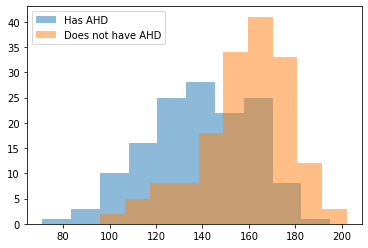

In [55]:
df_heart.loc[:,['AHD','Sex','Age','MaxHR']]
pd.crosstab(df_heart['AHD'], df_heart['Sex'])
pd.crosstab(df_heart['AHD'], df_heart['Age'])

hasAHD = df_heart[df_heart['AHD']==1]
hasntAHD = df_heart[df_heart['AHD']==0]
vector=[np.mean(hasAHD['Age']),np.mean(hasntAHD['Age'])]
#np.mean(hasAHD)
#display(pd.crosstab(df_heart['AHD'], np.mean(df_heart['MaxHR']), colnames=["MeanHR"],))
plt.hist(hasAHD['MaxHR'],alpha=0.5,label='Has AHD')
plt.hist(hasntAHD['MaxHR'],alpha=0.5,label='Does not have AHD')
plt.legend()
#vector
display(pd.crosstab(df_heart['AHD'], vector))


**Q0.2** Interpret your EDA in the previous part.  Which of the predictors would be most useful in a classification model to predict `AHD`?

Answer KK : 
Interpretations:
* Sex is related to AHD (men has higher chance of AHD)
* Lower MaxHR has a relationship with higher AHD
* Older people have more AHD than younger, on average

###### Sex seems to have the stronges relationship amongst these. To check it formally we could perform a t-test on regression with each of the predictors towards AHD

---

## Part 1: Logistic Regression Modeling

Below are both a linear regression model and a [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) fit using sklearn to predict `AHD` from `Age`.

In [61]:
np.sort([3,2,5])

array([2, 3, 5])

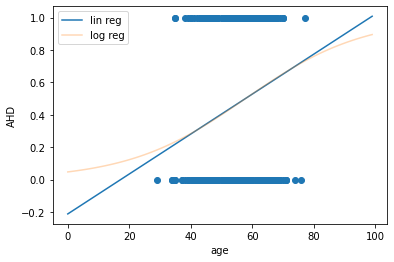

Linear Regression Estimated Betas: -0.21198629605591568 [0.01232082]
Logistic Regression Estimated Betas: [-3.00591177] [[0.05198618]]


In [121]:
data_x = df_heart[['Age']]
data_y = df_heart['AHD']
dummi = np.arange(0,100).reshape(-1, 1)

regress1 = LinearRegression(fit_intercept=True).fit(data_x, data_y)
logit1 = LogisticRegression(C=10000,fit_intercept=True).fit(data_x, data_y)
plt.plot(np.sort(dummi),regress1.predict(dummi),label='lin reg')
plt.plot(np.sort(dummi),logit1.predict_proba(dummi)[:,1], alpha=0.3,label='log reg')
plt.xlabel('age')
plt.ylabel('AHD')
plt.scatter(data_x,data_y)
plt.legend()
plt.show()
print("Linear Regression Estimated Betas:",regress1.intercept_,regress1.coef_)
print("Logistic Regression Estimated Betas:",logit1.intercept_,logit1.coef_)

Two different prediction commands can be used on a logistic regression model in sklearn (be careful of the form of the output from them):
- `model.predict(X)`: to get the predicted classifications (0 or 1, here)
- `model.predict_proba(X)`: to get the predicted probabilities of 'success' and 'failure'
        
**Q1.1** Calculate both types of predictions for the patients in the data set for `logit1`.  What do you notice?

In [82]:
######
# your code here
######

yhat_prob = logit1.predict_proba(data_x)

#print(yhat_prob[:,1])
#(yhat_prob)

**Q1.2** Use the array of predicted probabilities to perform the classifications manually (feel free to check your answers with sklearn's classifications). 

In [94]:
 range(len(data_x))

range(0, 303)

In [108]:
classificationAHD=[]
for i in range(len(data_x)):
    if yhat_prob[i,1] < 0.5:
        classificationAHD.append([0])
    else:
        classificationAHD.append([1])
np.unique(classificationAHD,return_counts=True)

(array([0, 1]), array([179, 124], dtype=int64))

In [111]:
np.unique(logit1.predict(data_x), return_counts=True)

(array([0, 1]), array([179, 124], dtype=int64))

In [107]:
print(len(hasntAHD))
print(len(hasAHD))

print('the predictions and actual values are not equal, but similar. should check if they should be equal when they are fitted on the same values.')

164
139
the predictions and actual values are not equal, but similar. should check if they should be equal when they are fitted on the same values.


**Q1.3** Determine the classification boundary mathematically (using the estimated coefficients): what range of values of `Age` would a patient be predicted to have a heart attack?

In [ ]:
######
# your code here
######
log(y=1/y=0)=beta0+beta1x
#der 0 er per endring av age
# hva er "the classification boundry ?"

The estimated logistic regression model is (fill in the estimates and answer):
$$\ln\left(\frac{\widehat{P}(Y=1)}{1-\widehat{P}(Y=1)}\right) = \hat{\beta}_0 + \hat{\beta}_1 \cdot X$$


Below is some code to plot the predictions from the linear regression model on the probability scale added to he scatterplot of points.

**Q1.4** Add the logistic curve for the predicted probabilities from `logit1`.  Which function is better to describe `AHD` from `Age`?  Why?

In [ ]:
dummy_x=np.linspace(np.min(data_x)-10,np.max(data_x)+10)
yhat_regress = regress1.predict(dummy_x.reshape(-1,1))
plt.plot(data_x, data_y, 'o' ,alpha=0.2, label='Data')
plt.plot(dummy_x, yhat_regress, label = "OLS")

######
# your code here
######



---

## Part 2: More Logistic Regression Modeling 

**Q2.1** Fit a logistic regression model (`logit2`) to predict `AHD` from `Sex` and predict the probability of a heart attach for men and women separately from this model.  Confirm that these estimates are correct based on the contingency table .
Hint: What proportion of women had heart attacks in the dataset?  What proportion of men?

intercept: [-1.05778598] coeficient: [[1.27219426]]
the prob for AHD for men is: [0.55339767]
the prob for AHD for women is: [0.25773278]
[-1.05778598]


array([[1.27219426]])

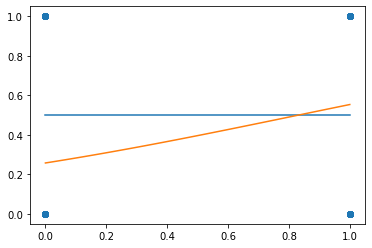

In [253]:
data_x2 = df_heart[['Sex']]
logit2 =  LogisticRegression(penalty="none", fit_intercept=True).fit(data_x2, data_y)
print('intercept:', logit2.intercept_,'coeficient:', logit2.coef_)

x2dummy = np.linspace(np.min(data_x2),np.max(data_x2))
pred_men = logit2.predict_proba(x2dummy)[:,1]
# fit the model and print out the coefficient estimates
plt.plot(x2dummy,[0.5]*len(x2dummy))
# create an np.array with just a single 0 or 1 in it, reshape it, and use it to do the predictions
plt.plot(x2dummy,pred_men)
plt.scatter(data_x2,data_y)

print('the prob for AHD for men is:',logit2.predict_proba([[1]])[:,1])
print('the prob for AHD for women is:',str(logit2.predict_proba([[0]])[:,1]))

print(logit2.intercept_)
logit2.coef_

In [157]:
logit2.predict_proba([[1]])[:,1]

array([0.55339767])

In [ ]:
# observed proportions

**Q2.2** Fit two more logistic regression models:
- `logit3` to predict `AHD` from `Sex` and `Age`.  
- `logit4` to predict `AHD` from `Sex` and `Age` and the interaction between the two predictors.

What is the difference betwen these two modeling choices (aka, what does the interaction term allow for)?  

In [336]:


x_sex = df_heart['Sex']
x_age = df_heart['Age']
testtt=np.array([x_sex,x_age]).reshape(-1,2)
yoyo = sm.tools.tools.add_constant(testtt)
df_heart[['Sex','Age']]
np.shape(testtt)

SyntaxError: can't assign to function call (<ipython-input-336-822d746a2d56>, line 1)

In [337]:

# create the single interaction term
df_heart['Sex_Age'] = df_heart['Sex']*df_heart['Age']
#fit the models
logit3 =  LogisticRegression(penalty="none", fit_intercept=True).fit(df_heart[['Sex','Age']], data_y)
logit4 =  LogisticRegression(penalty="none", fit_intercept=True).fit(df_heart[['Sex','Age','interaction_Sex_Age']], data_y)
#print out the coefficients
print('the coefficients without interaction term are:',logit3.intercept_, logit3.coef_)
print('the coefficients with interaction term are:',logit4.intercept_, logit4.coef_)

the coefficients without interaction term are: [-4.80775552] [[1.49888219 0.06571155]]
the coefficients with interaction term are: [-4.27422447] [[0.77549284 0.05653821 0.01272526]]


*your answer here*

**Q2.3** From `logit4` plot the predicted probability of a heart attack as a function of age separately for females and males (2 separate curves).  What do you notice in these curves?

C:\Users\krist\anaconda3\envs\cs109a\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


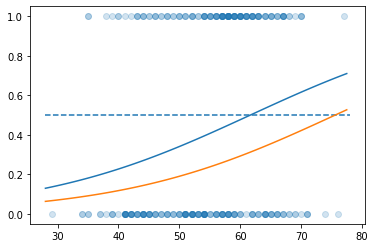

In [311]:
# logit4.predict(sm.add_constant(dummy_x))
ddd= pd.DataFrame(sm.add_constant(dummy_x))
ddd[2]=ddd[0]
dddNull= ddd.copy
dddNull=pd.DataFrame(ddd,copy=True)
dddNull[0]=0
dddNull[2]=0
dddNull
# ddd
# logit4.coef_[0][1]
plt.plot(dummy_x, logit4.predict_proba(sm.add_constant(ddd))[:,1])
plt.plot(dummy_x, logit4.predict_proba(dddNull)[:,1])
plt.scatter(df_heart['Age'], df_heart['AHD'], alpha=0.2, label='Data')
plt.hlines(0.5,xmin=np.min(df_heart['Age'])-1,xmax=np.max(df_heart['Age'])+1,linestyle="dashed")

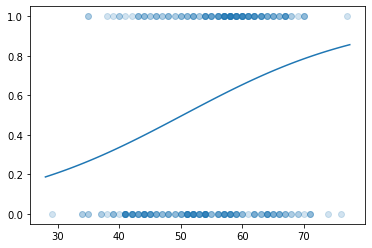

In [312]:
# dummy_x = np.arange(np.min(df_heart['Age'])-1,np.max(df_heart['Age'])+1,0.5)
plt.plot(dummy_x, logit3.predict_proba(sm.add_constant(dummy_x))[:,1])
plt.scatter(df_heart['Age'], df_heart['AHD'], alpha=0.2, label='Data')

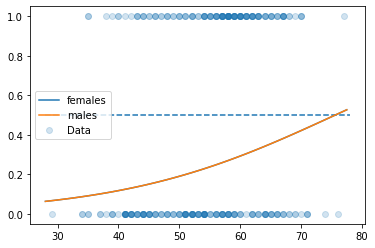

In [282]:
dummy_x = np.arange(np.min(df_heart['Age'])-1,np.max(df_heart['Age'])+1,0.5)
yhat_female = (logit4.intercept_[0])+(logit4.coef_[0][1])*dummy_x
yhat_male = (logit4.intercept_[0])+(logit4.coef_[0][1])*dummy_x

# plt.hlines(0.3)

plt.scatter(df_heart['Age'], df_heart['AHD'], alpha=0.2, label='Data')
plt.plot(dummy_x,1/(1+np.exp(-yhat_female)),label="females")
plt.plot(dummy_x,1/(1+np.exp(-yhat_male)),label="males")
plt.hlines(0.5,xmin=np.min(df_heart['Age'])-1,xmax=np.max(df_heart['Age'])+1,linestyle="dashed")
plt.legend()
plt.show()

*your answer here*

**Q2.5** Using `logit4`, at what ages will males be predicted to have a heart attack in a classification?  At what ages will females be predicted to have a heart attack?  Justify based on the plot above.

In [329]:
sum(logit4.coef_[0][1:3])
# logit4.coef_

0.06926346917815795

In [331]:
######
# your code here
######
# print(logit4.coef_)
logit4.intercept_
Xclass_age = -(logit4.intercept_[0]+logit4.coef_[0][0])/sum(logit4.coef_[0][1:3])
Xclass_age



50.513375665243

*your answer here*


---

## Part 3: Classification Accuracy

We split the relevant data into train and test (67-33 split) below for you.  Use this to help score several models we suggest below.

In [338]:
df_heart['Sex_MaxHR']=df_heart['Sex']*df_heart['MaxHR']
df_heart['Age_MaxHR']=df_heart['Age']*df_heart['MaxHR']

X_data = df_heart[['Sex','Age','MaxHR','RestBP','Chol','Sex_Age','Sex_MaxHR','Age_MaxHR']]
y_data = df_heart['AHD']

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X_data, y_data, test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(203, 8) (100, 8) (203,) (100,)


**Q3.1** Fit an 'unregularized' logistic regression model (`logit5`) to predict `AHD` from all the predictors in the training set.  Determine the misclassification rate in both the train and test sets.

In [365]:
logit5 = LogisticRegression(penalty="none", fit_intercept=True).fit(X_train, y_train)

truePositive = logit5.predict(X_train)*y_train
falsePositive = (1-logit5.predict(X_train))*y_train
trueNegative = logit5.predict(X_train)*(1-y_train)
falseNegative = (1-logit5.predict(X_train))*(1-y_train)
tabell = [[np.sum(truePositive),np.sum(falsePositive)],[np.sum(trueNegative),np.sum(falseNegative)]]
pd.DataFrame(tabell, index=['Positiv','Negativ'], columns=['True','False'])
# np.sum(tabell)

,True,False
Positiv,58,32
Negativ,22,91


In [376]:
print("Overall misclassification rate in train:",1-logit5.score(X_train, y_train))
1-(np.sum(truePositive)+np.sum(trueNegative))/(np.sum(tabell))
1/2.34

Overall misclassification rate in train: 0.2660098522167488


0.4273504273504274

**Q3.2** Fit a 'regularized' logistic regression model (`logit6`) to predict `AHD` from all the predictors in the training set (with `C=0.001`).  Compare the coefficient estimates in `logit6` to `logit5`, and determine the misclassification rate in both the train and test sets.  How have things changed?

In [383]:
logit6 = LogisticRegression(C=0.001, fit_intercept=True).fit(X_train, y_train)
# print('intercept for logit6:',logit6.intercept_)
print('coefficients for logit6:',logit6.coef_)
# print('intercept for logit5:',logit5.intercept_)
print('coefficients for logit5:',logit5.coef_)
print('intercept is more negative in logit 5, while the coeficcientes are rather similar, but different')


coefficients for logit6: [[ 6.06488303e-04 -1.35651351e-03 -4.20434233e-02  1.57786995e-02
   7.29108428e-03  3.25358386e-02 -5.04632902e-05  1.35226387e-04]]
coefficients for logit5: [[ 0.00131957 -0.02639231 -0.04473323  0.02000722  0.00816757  0.04997107
  -0.00586439  0.00025235]]
intercept is more negative in logit 5, while the coeficcientes are rather similar, but different


*your answer here*

**Q3.3** Calculate the confusion tables in the test set for `logit5` when the cut-off is the typical 0.5 and when it is 0.8.  Calculate the sensitivity and specificity of this classification algorithm fior each of these cut-offs.
Hint:  [sk.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) will be useful for this task.

In [399]:
from sklearn.metrics import confusion_matrix
yhat_test_logit5 = logit5.predict_proba(X_test)[:,1]
print('The average predicted probability is',np.mean(yhat_test_logit5))

print('0.5: \n',confusion_matrix(y_test, yhat_test_logit5>0.5))
print('0.8:\n',confusion_matrix(y_test, yhat_test_logit5>0.8))
      
######
# your code here
######



The average predicted probability is 0.491120102059533
0.5: 
 [[37 14]
 [18 31]]
0.8:
 [[49  2]
 [34 15]]


The ROC curve for `logit5` is shown below using `sk.metrics.roc_curve`

In [400]:
fpr, tpr, thresholds = sk.metrics.roc_curve(y_test, yhat_test)

x=np.arange(0,100)/100
plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for Predicting AHD in a Logistic Regression Model")
plt.show()

NameError: name 'yhat_test' is not defined

**Q3.4** For `logit6`, determine the predicted probabilties in test and calculate and print the ROC Curve for this model (it's helpful if you plot both ROC curves from `logit5` and `logit6` together).

In [ ]:
######
# your code here
######


**Q3.5** Use the ROC curves above to eyeball which of `logit5` and `logit6` is a better classification model based on Area Under the ROC Curve (AUC).  Then, calculate the actual AUC for these two models. 

Hint: use [sklearn.metrics.auc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

In [ ]:
######
# your code here
######


In [ ]:
*your answer here*